In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('results/N100-F1000-S100-R100-result-v14.csv')
df.describe()

,correlation,load,v1,v2,disturbance,mean_ca,actual_load
count,56700.000000,56700.000000,4.266600e+04,42666.000000,56700.000000,56700.000000,5.670000e+04
mean,0.500000,0.700000,6.903100e+06,1610.060080,0.184606,0.497486,2.004257e+06
std,0.302768,0.129101,8.143602e+06,1602.062788,0.064276,0.134540,1.118936e+05
min,0.000000,0.500000,8.855692e+05,139.117809,0.000345,0.209573,1.490691e+06
25%,0.250000,0.600000,2.774893e+06,426.219864,0.148035,0.393599,1.936076e+06
50%,0.500000,0.700000,4.288688e+06,752.890389,0.180300,0.505026,2.000394e+06
75%,0.750000,0.800000,7.804394e+06,2666.901894,0.241778,0.602333,2.068945e+06
max,1.000000,0.900000,1.455432e+08,5000.000000,0.301018,0.847029,2.357444e+06


In [3]:
df.head()

,correlation,load,algorithm,v1,v2,disturbance,mean_ca,actual_load
0,0.0,0.50,SALP,2.013470e+06,155.732368,0.170859,0.21435,2.003560e+06
1,0.0,0.55,SALP,2.462669e+06,190.451474,0.170859,0.21435,2.003560e+06
2,0.0,0.60,SALP,3.025211e+06,233.918731,0.170859,0.21435,2.003560e+06
3,0.0,0.65,SALP,3.750314e+06,289.927176,0.170859,0.21435,2.003560e+06
4,0.0,0.70,SALP,4.720630e+06,364.841990,0.170859,0.21435,2.003560e+06


In [4]:
df.corr()

,correlation,load,v1,v2,disturbance,mean_ca,actual_load
correlation,1.000000e+00,-1.124640e-17,0.008170,0.440881,-4.976825e-01,9.590589e-01,-4.491748e-02
load,-1.124640e-17,1.000000e+00,0.629875,0.698190,2.322824e-19,-7.045896e-21,-2.629499e-18
v1,8.170004e-03,6.298755e-01,1.000000,0.607542,-1.155133e-01,-1.515410e-03,3.028199e-01
v2,4.408812e-01,6.981903e-01,0.607542,1.000000,-4.186234e-01,4.553419e-01,1.681279e-01
disturbance,-4.976825e-01,2.322824e-19,-0.115513,-0.418623,1.000000e+00,-4.179485e-01,-3.885344e-02
mean_ca,9.590589e-01,-7.045896e-21,-0.001515,0.455342,-4.179485e-01,1.000000e+00,-7.347517e-02
actual_load,-4.491748e-02,-2.629499e-18,0.302820,0.168128,-3.885344e-02,-7.347517e-02,1.000000e+00


In [5]:
df = df.drop('v1', axis=1)

In [6]:
vals = df.drop(['disturbance', 'actual_load', 'mean_ca'], axis=1).groupby(['algorithm', 'correlation', 'load']).median()
vals = vals.unstack(0)
vals.reset_index(inplace=True)
vals.head()

correlation  load          v2                        
algorithm                            BF          RR        SALP
0                 0.0  0.50  174.998890  197.396051  156.146340
1                 0.0  0.55  213.914296  258.075598  190.915420
2                 0.0  0.60  262.626199  341.498823  234.606686
3                 0.0  0.65  325.714093  489.821511  291.011851
4                 0.0  0.70  412.098556  695.591449  366.487539

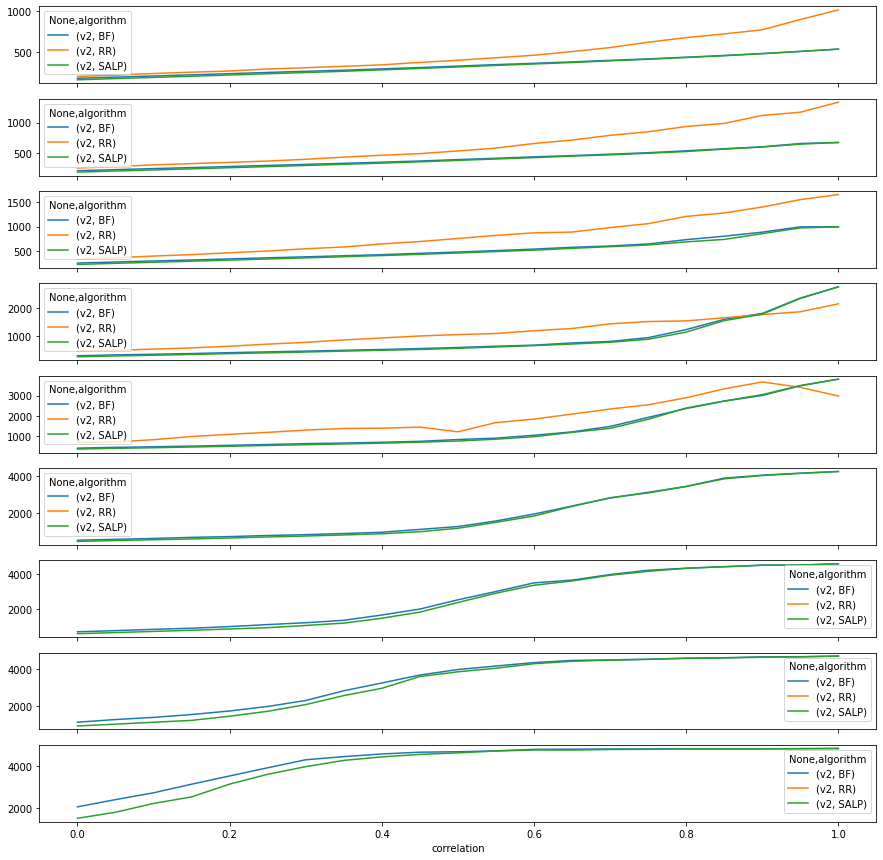

In [7]:
loads = vals['load'].unique()
fig, axes = plt.subplots(loads.size, 1, figsize=(15,15), sharex=True)
for i in range(loads.size):
    vals[vals['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i], legend=True)
plt.show()

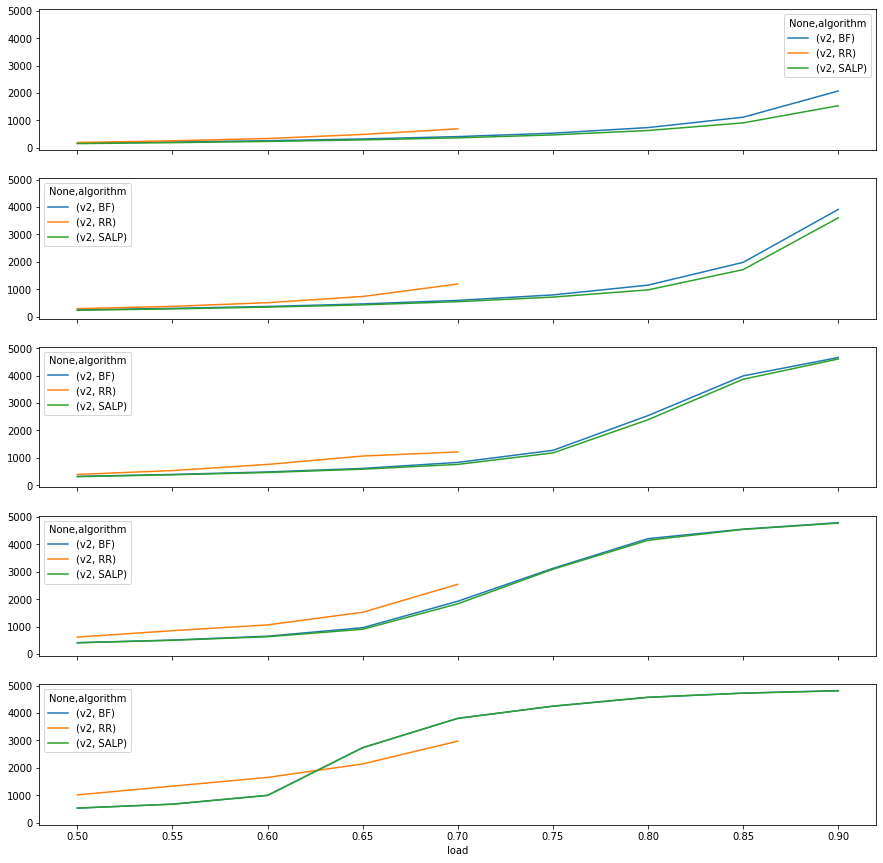

In [8]:
cors = np.array([0,.25,.5,.75,1])
# cors = np.array([-1])
fig, axes = plt.subplots(cors.size, 1, figsize=(15,15), sharex=True, sharey=True)
for i in range(cors.size):
    vals[vals['correlation']==cors[i]].drop('correlation', axis=1).plot(x='load', ax=axes[i], legend=True)
plt.show()

In [9]:
df.groupby(['algorithm', 'load']).count()

correlation    v2  disturbance  mean_ca  actual_load
algorithm load                                                      
BF        0.50         2100  2100         2100     2100         2100
          0.55         2100  2100         2100     2100         2100
          0.60         2100  2100         2100     2100         2100
          0.65         2100  2100         2100     2100         2100
          0.70         2100  2100         2100     2100         2100
          0.75         2100  2100         2100     2100         2100
          0.80         2100  2100         2100     2100         2100
          0.85         2100  2094         2100     2100         2100
          0.90         2100  1974         2100     2100         2100
RR        0.50         2100  2036         2100     2100         2100
          0.55         2100  1657         2100     2100         2100
          0.60         2100  1010         2100     2100         2100
          0.65         2100   461         2100     2100         2100
          0.70         2100    54         2100     2100         2100
          0.75         2100     0         2100     2100         2100
          0.80         2100     0         2100     2100         2100
          0.85         2100     0         2100     2100         2100
          0.90         2100     0         2100     2100         2100
SALP      0.50         2100  2100         2100     2100         2100
          0.55         2100  2100         2100     2100         2100
          0.60         2100  2100         2100     2100         2100
          0.65         2100  2100         2100     2100         2100
          0.70         2100  2100         2100     2100         2100
          0.75         2100  2100         2100     2100         2100
          0.80         2100  2100         2100     2100         2100
          0.85         2100  2077         2100     2100         2100
          0.90         2100  1903         2100     2100         2100

In [10]:
dist = df.drop(['v2', 'actual_load', 'mean_ca', 'load'], axis=1)
dist = dist.drop_duplicates()
dist = dist.groupby(['algorithm', 'correlation']).mean()
dist = dist.unstack(0)
dist.reset_index(inplace=True)
dist

correlation disturbance                    
algorithm                      BF        RR      SALP
0                0.00    0.206603  0.273351  0.172379
1                0.05    0.205541  0.273351  0.170247
2                0.10    0.204339  0.273033  0.168341
3                0.15    0.202774  0.272500  0.166198
4                0.20    0.200870  0.271783  0.163790
5                0.25    0.198606  0.270888  0.161461
6                0.30    0.196421  0.269802  0.158926
7                0.35    0.193710  0.268520  0.156490
8                0.40    0.190786  0.267021  0.153556
9                0.45    0.187299  0.265273  0.150722
10               0.50    0.183572  0.263234  0.147362
11               0.55    0.179411  0.260851  0.143778
12               0.60    0.174346  0.258054  0.139831
13               0.65    0.168468  0.254751  0.135191
14               0.70    0.161897  0.250813  0.129834
15               0.75    0.153596  0.246048  0.123459
16               0.80    0.143381  0.240165  0.115580
17               0.85    0.130706  0.232688  0.105755
18               0.90    0.113198  0.222743  0.092198
19               0.95    0.086410  0.208208  0.071335
20               1.00    0.000471  0.176693  0.001598

<AxesSubplot:xlabel='correlation'>

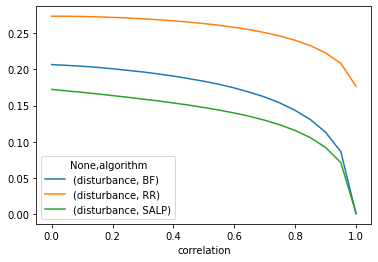

In [11]:
# loads = vals['load'].unique()
# fig, axes = plt.subplots(loads.size, 1, figsize=(15,15), sharex=True)
# for i in range(loads.size):
#     dist[dist['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i], legend=True)
# plt.show()
dist.plot(x='correlation', legend=True)

In [12]:
acld = df.drop(['algorithm', 'v2', 'disturbance', 'mean_ca', 'load'], axis=1).groupby(['correlation']).mean()
acld = acld.drop_duplicates()
# acld = acld.unstack(0)
acld.reset_index(inplace=True)
acld.head()

,correlation,actual_load
0,0.00,2.002710e+06
1,0.05,2.002704e+06
2,0.10,2.004965e+06
3,0.15,2.007052e+06
4,0.20,2.008791e+06


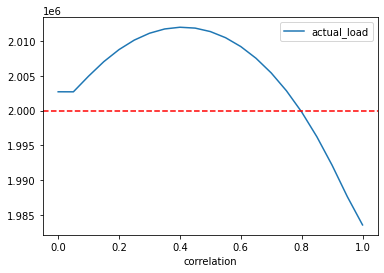

In [13]:
est = 2.0 * 10**6
# loads = acld['load'].unique()
# fig, axes = plt.subplots(loads.size, 1, figsize=(15,15), sharex=True)
# for i in range(loads.size):
#     acld[acld['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i], legend=True)
#     axes[i].axhline(est,color='red',ls='--')
# plt.show()
fig, ax = plt.subplots()
acld.plot(x='correlation', ax=ax, legend=True)
ax.axhline(est,color='red',ls='--')
plt.show()

In [14]:
# loads = acld['load'].unique()
# fig, axes = plt.subplots(loads.size, 2, figsize=(20,15), sharex=True)
# for i in range(loads.size):
#     acld[acld['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i][0], legend=True)
#     axes[i][0].axhline(est,color='red',ls='--', label="estimated")
#     vals[vals['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i][1], legend=True)

# plt.show()

In [15]:
mca = df.drop(['v2', 'actual_load', 'disturbance', 'load'], axis=1)
mca = mca.drop_duplicates()
mca = mca.groupby(['algorithm', 'correlation']).mean()
mca = mca.unstack(0)
mca.reset_index(inplace=True)
mca.head()

correlation   mean_ca                    
algorithm                    BF        RR      SALP
0                0.00  0.261160  0.264082  0.215662
1                0.05  0.300132  0.300322  0.261213
2                0.10  0.332323  0.331292  0.298815
3                0.15  0.360565  0.359017  0.331451
4                0.20  0.386174  0.384429  0.360693

<AxesSubplot:xlabel='correlation'>

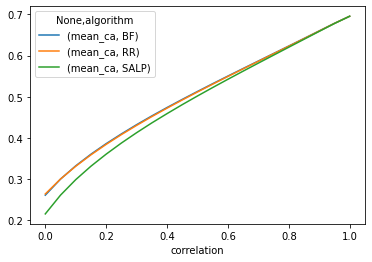

In [16]:
mca.plot(x='correlation', legend=True)